In [39]:
import pandas as pd
import numpy as np
df = pd.read_csv("laptops.csv", header=0)
df.head(10)

,Index,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
5,5,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.20,1016
6,6,HP,3,Full HD,3,1,5,39.624,1.6,8,256,2.10,1117
7,7,Acer,3,IPS Panel,2,1,5,38.100,1.6,4,256,2.20,866
8,8,Dell,3,Full HD,1,1,5,39.624,2.5,4,256,2.30,812
9,9,Acer,3,IPS Panel,3,1,7,38.100,1.8,8,256,2.20,1068


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [41]:
df.head(5)

,Index,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


### Evaluate for missing data

In [42]:
missing_data = df.isnull()
missing_data.head()

,Index,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
missing_data.columns.values.tolist()

['Index',
 'Manufacturer',
 'Category',
 'Screen',
 'GPU',
 'OS',
 'CPU_core',
 'Screen_Size_cm',
 'CPU_frequency',
 'RAM_GB',
 'Storage_GB_SSD',
 'Weight_kg',
 'Price']

In [44]:
for col in missing_data.columns.values.tolist():
    print(missing_data[col].value_counts())

Index
False    238
Name: count, dtype: int64
Manufacturer
False    238
Name: count, dtype: int64
Category
False    238
Name: count, dtype: int64
Screen
False    238
Name: count, dtype: int64
GPU
False    238
Name: count, dtype: int64
OS
False    238
Name: count, dtype: int64
CPU_core
False    238
Name: count, dtype: int64
Screen_Size_cm
False    234
True       4
Name: count, dtype: int64
CPU_frequency
False    238
Name: count, dtype: int64
RAM_GB
False    238
Name: count, dtype: int64
Storage_GB_SSD
False    238
Name: count, dtype: int64
Weight_kg
False    233
True       5
Name: count, dtype: int64
Price
False    238
Name: count, dtype: int64


### Replace with mean
Missing values in attributes that have continuous data are best replaced using Mean value

"Continuous values are numerical measurements that can take any value within a range, including decimals."

In [45]:
avg_weight = df["Weight_kg"].astype('float').mean(axis=0)
avg_weight

np.float64(1.8622317596566522)

### Replace with the most frequent value

Missing values in attributes that have categorical data are best replaced using the most frequent value. 

In [46]:
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
common_screen_size # here screen size is the index

np.float64(39.624)

In [47]:
df.replace({'Screen_Size_cm': {np.nan: common_screen_size}}, inplace=True)
# or df['Screen_Size_cm'] = df['Screen_Size_cm'].replace(np.nan, common_screen_size)

### Fixing Datatype

In [48]:
df[["Weight_kg","Screen_Size_cm"]] = df[["Weight_kg","Screen_Size_cm"]].astype("float")

### Data Standardization

In [49]:
df["Weight_kg"] = df["Weight_kg"]*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

In [50]:
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)

Normalization

In [51]:
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

In [52]:
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )

In [53]:
df["Price-binned"].value_counts()

Price-binned
Low       160
Medium     72
High        6
Name: count, dtype: int64

In [54]:
df["Price-binned"]

0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
233    Medium
234    Medium
235    Medium
236       Low
237       Low
Name: Price-binned, Length: 238, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

Text(0.5, 1.0, 'Price bins')

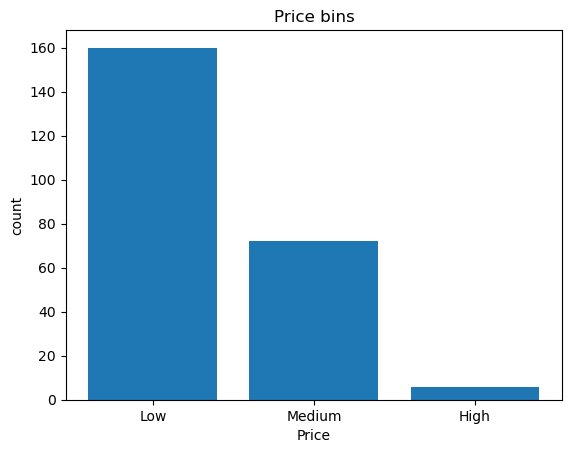

In [55]:
import matplotlib.pyplot as plt
counts = df["Price-binned"].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")


### Categorial values to Quantitative values

In [56]:
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1

,Full HD,IPS Panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False
...,...,...
233,False,True
234,True,False
235,False,True
236,True,False


In [57]:
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)
df.head()

,Index,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,IPS Panel,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,Full HD,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,Full HD,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,IPS Panel,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,Full HD,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,True,False


In [58]:
df.drop("Screen", axis = 1, inplace=True)

In [59]:
df.head()

,Index,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,True,False
